# Result Visualization

Now that scores have been calcualted, time to review the results

In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [66]:
mssa_scores = gpd.read_file('MSSA_scores.gpkg', layer = 'scores')

In [67]:
mssa_scores.head()

,MSSA_ID,SCORE,hospital_component,provider_ratio_component,poverty_component,geometry
0,2i,6.250,5.250000,1.0,0.0,"MULTIPOLYGON (((596891.857 4146959.777, 596890..."
1,78.2h,10.500,4.500000,1.0,5.0,"POLYGON ((943117.251 3774099.229, 943097.915 3..."
2,78.2ff,12.000,3.000000,5.0,4.0,"POLYGON ((940819.280 3779867.139, 940792.227 3..."
3,78.2ffff,12.143,2.142857,5.0,5.0,"POLYGON ((937660.196 3775598.751, 937638.671 3..."
4,78.2mmm,9.500,4.500000,0.0,5.0,"POLYGON ((939016.709 3769541.718, 938982.738 3..."


In [68]:
mssa_scores.SCORE.describe()

count    542.000000
mean      11.303153
std        5.079934
min        0.000000
25%        8.062500
50%       10.250000
75%       12.750000
max       35.000000
Name: SCORE, dtype: float64

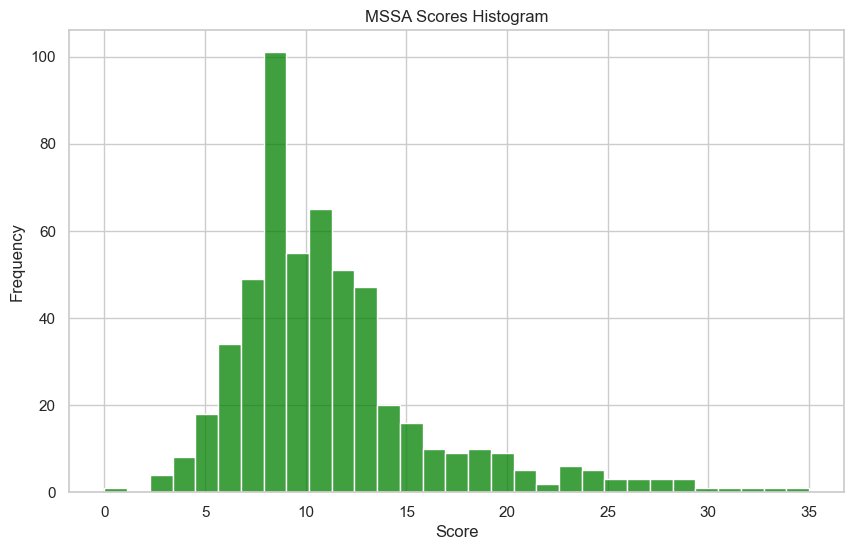

In [69]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="pastel")
sns.histplot(mssa_scores.SCORE, kde=False, color="green")
plt.title("MSSA Scores Histogram")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.show()

# Determining MSSAs of focus

We want to focus on the 80th percentile and above of scores for MSSAs of high priority

In [93]:
high_score_threshold = mssa_scores.SCORE.quantile(0.50)
high_score_threshold

10.25

In [71]:
high_priority_mssas = mssa_scores.query(f'SCORE >= {high_score_threshold}').sort_values('SCORE', ascending = False)
high_priority_mssas.head()

,MSSA_ID,SCORE,hospital_component,provider_ratio_component,poverty_component,geometry
512,46,35.00,26.00,4.0,5.0,"POLYGON ((1299533.870 3670803.197, 1299533.961..."
391,226,33.75,23.75,5.0,5.0,"POLYGON ((494437.439 4460156.815, 494451.284 4..."
390,225,32.25,26.25,2.0,4.0,"POLYGON ((497921.840 4495697.239, 497922.599 4..."
250,90,31.50,22.50,4.0,5.0,"POLYGON ((453525.247 4428113.160, 453520.950 4..."
500,92,29.50,22.50,2.0,5.0,"POLYGON ((505336.312 4405357.320, 505331.683 4..."


In [72]:
high_prio_mssa_iterator = high_priority_mssas.itertuples()

In [73]:
row = next(high_prio_mssa_iterator)
hospitals = gpd.read_file(f'output_mssa_scores/{row.MSSA_ID}.geojson')
hospitals['geometry'] = hospitals.buffer(500) # increase size of hospital locations for clarity

m = hospitals.explore(color="red", name="Hospitals", marker_type = 'circle_marker', popup = True, tiles='Esri WorldStreetMap')
m = mssa_scores.query(f'MSSA_ID == "{row.MSSA_ID}"').explore(m=m, name="MSSA", popup = True)


# this is completely optional
folium.LayerControl().add_to(m)

m

In [74]:
len(high_priority_mssas)

109

In [75]:
len(mssa_scores)

542

# Visuailzation

In [76]:
mssa_iterator = mssa_scores.itertuples()

In [91]:
row = next(mssa_iterator)
hospitals = gpd.read_file(f'output_mssa_scores/{row.MSSA_ID}.geojson')
hospitals['geometry'] = hospitals.buffer(175) # increase size of hospital locations for clarity

m = mssa_scores.query(f'MSSA_ID == "{row.MSSA_ID}"').explore(name="MSSA", popup = True,tiles='Esri WorldStreetMap')
m = hospitals.explore(m=m, color="red", name="Hospitals", marker_type = 'circle_marker', popup = True)
# this is completely optional
folium.LayerControl().add_to(m)

m

In [15]:
m.save('BaldwinPark.html')